In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine, inspect

In [5]:
engine  = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
inspector = inspect(engine)
# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [7]:
query = """
            SELECT
                s.id,
                s.station,
                s.name,
                s.elevation,
                m.date,
                m.prcp,
                m.tobs
            FROM
                measurement m
            JOIN station s ON s.station = m.station;
        """

In [8]:
conn = engine.connect()
df = pd.read_sql(query, conn)
conn.close()
df.head()

,id,station,name,elevation,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-06,NaN,73.0


In [9]:
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

In [10]:
query2 = """
            SELECT
               date,
               prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23'
        """

In [11]:
conn = engine.connect()
new_df = pd.read_sql(query2, conn).sort_values("date")
conn.close()
new_df.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [12]:
new_df["date"] = pd.to_datetime(new_df.date)
new_df.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


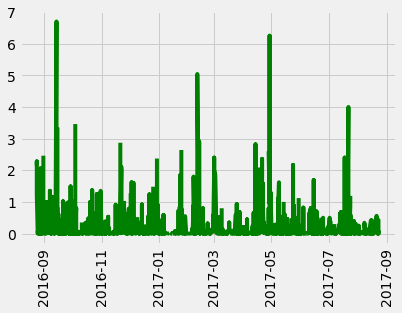

In [13]:
plt.plot(new_df.date, new_df.prcp, color="green")
plt.xticks(rotation=90)
plt.show()

In [14]:
query3 = """
            SELECT
                station,
                COUNT(station) as "most_active"
            FROM
                measurement
            Group by
                station
            ORDER BY 
                most_active DESC
            LIMIT
                1
        """

In [15]:
conn = engine.connect()
df3 = pd.read_sql(query3, conn)
conn.close()
df3.head()

,station,most_active
0,USC00519281,2772


In [16]:
query5 = """
            SELECT
                tobs
            FROM
                measurement
            WHERE 
                date BETWEEN '2016-08-23' AND '2017-08-23' and station = 'USC00519281'                
        """

In [17]:
conn = engine.connect()
data = pd.read_sql(query5, conn)
conn.close()
data.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


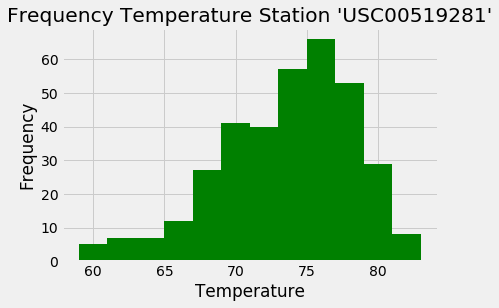

In [18]:
plt.hist(data.tobs, bins=12, color='green')
plt.title("Frequency Temperature Station 'USC00519281'")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()